In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DBSCAN

The DBSCAN is a clustering algorithm based on the concept of **density**. The name of the algorithm is an acronym, which explains well its functioning: **D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise. The algorithm was proposed with the objective of providing a clustering technique that can work **even when the clusters to be created are not uniform**, having **size, shape and variable density**. Further, by construction the method works well in contexts where there are **noises/outliers**, being able to detect them without influencing the creation of clusters.

A huge advantage is the fact that the algorithm **does not require the prior determination of the number of clusters**, which is an interesting advantage if there are no indications of the business problem for this determination (although, as we will see, there are still important hyperparameters to be determined).

The algorithm has as its fundamental principle the **determination of regions of high density of observations**, which are **separated from each other by regions of low density**. Remembering that, being an unsupervised clustering algorithm, when we refer to "regions" whose density will be measured, we are referring to regions **of the feature space**.

> **Density in a point $P$:** number of points inside a circle of radius $\epsilon$ centered at point $P$ (region called $\epsilon$-neighborhood of $P$);

> **Dense region**: we say that a region is dense if the circle of radius $\epsilon$ contains at least a minimum number of points (which we will call $\text{minPts}$). A dense region **will form a cluster**.

To visualize the definitions above, consider the figure below:

<img src=https://www.researchgate.net/publication/335485895/figure/fig2/AS:797412515909651@1567129367940/A-single-DBSCAN-cluster-with-Core-Border-and-Noise-Points.ppm width=500>

Given the definition above, we can classify points within a cluster as:

> **Core points**: points that are inside the clusters (dense regions). Mathematically, a point is considered core **if its density is at least $\text{minPts}$**, that is, if **there are at least $\text{minPts}$ points within the circle of radius $\epsilon$ centered at the point**.

> **Border points**: points that are on the border of a cluster. Mathematically, these points **have density less than $\text{minPts}$**, but that **are part of the $\epsilon$-neighborhood of a core point**.

> **Noisy points**: points that are neither core nor border. These points are not part of the cluster, and are considered outliers.

Looking at the definitions above, and the figures, it is clear that $\epsilon$ and $\text{minPts}$ are the hyperparameters of the model - and that the generated clusters are strongly dependent on these hyperparameters.

>$\epsilon$ (`eps`): determines how close (relative to a given **distance metric**) points must be to each other to be considered neighbors, and eventually part of a cluster. In practice, **if the distance between two points is less than or equal to $\epsilon$, the points will be considered neighbors**. if the value of `eps` is too small, most of the data will not be clustered - many points will be considered outliers, as there will not be enough neighbors to generate a dense region. On the other hand, if the value of `eps` is too large, the clusters will merge, and most of the points will be in a single, large cluster. Therefore, the choice of `eps` is strongly related to **the scale** of the features, which requires careful exploratory analysis. Also, note that `eps` also strongly depends on the **distance metric** (`metric` in sklearn) to be used.

>$\text{minPts}$: minimum number of points that must be neighbors to form a dense region, which will be a cluster

Larger values of `min_samples` are preferable for datasets with outliers, forming more significant clusters (that is, a cluster will only be formed if it really has a high density).

For some practical tips on how to estimate good values for the hyperparameters, [click here](https://en.wikipedia.org/wiki/DBSCAN#Parameter_estimation).

### DBSCAN algorithm

Now that we understand the principles and main hyperparameters of DBSCAN, let's now understand the steps of the algorithm (which is very simple):

> **Step 1**: the algorithm randomly chooses one of the points, and its $\epsilon$-neighborhood is calculated

> **Step 2**: if this point has $\text{minPts}$ in its $\epsilon$-neighborhood, the cluster formation is started (see next step). If not, the point is marked as outlier (but can be considered as border point of another cluster later). If it is an outlier, go back to step 1

> **Step 3**: if the point is a core point, all points in the neighborhood are added to the cluster, and step 1 is applied to each of them

> **Step 4**: the process of step 3 is continued until all points have a cluster associated, or are marked as noise.

Visualize below the DBSCAN in operation:

<img src=https://i.pinimg.com/originals/bb/3d/5e/bb3d5e522cbcb2dd07a81f8118de2041.gif width=500>

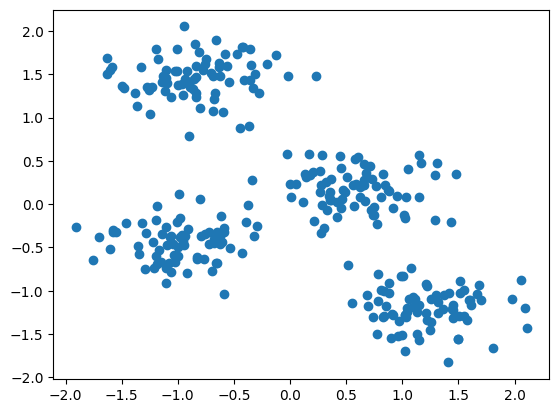

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)

X = StandardScaler().fit_transform(X)
X_df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])

plt.scatter(X[:,0], X[:,1]);

In [5]:
from sklearn.cluster import DBSCAN

def plot_dbscan(eps, min_pts):
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(X)

    labels_series = pd.Series(dbscan.labels_, name="label")
    df_result = pd.concat([X_df, labels_series], axis=1)
    n_clusters = pd.Series(dbscan.labels_).nunique()

    print(f"DBSCAN with eps={eps} and minPts={min_pts}\nNumber of clusters: {n_clusters}")
    sns.jointplot(data=df_result, x="X1", y="X2", hue="label", palette="viridis")
    plt.show()
    
    print("Quantity of points in each cluster:")
    print(pd.Series(dbscan.labels_).value_counts())
    
    return df_result

DBSCAN with eps=0.3 and minPts=4
Number of clusters: 5


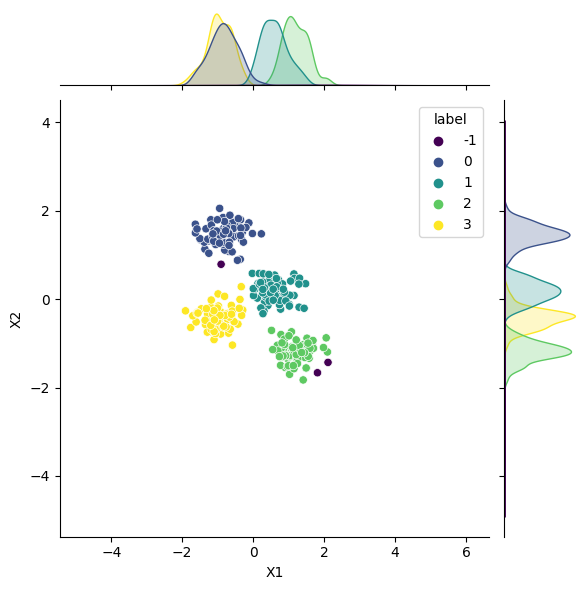

Quantity of points in each cluster:
 3    76
 0    74
 1    74
 2    73
-1     3
dtype: int64


In [9]:
df_result = plot_dbscan(eps=0.3, min_pts=4)

In [10]:
df_result.query("label == -1")

,X1,X2,label
5,2.108618,-1.431153,-1
205,-0.904542,0.787737,-1
218,1.811265,-1.665156,-1
